# Naïve Bayes Classifier – SmartHealth_T2D
This notebook trains and evaluates a Naïve Bayes model on the preprocessed UCI diabetes dataset.

In [3]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/ucidata.csv")

# Encode categorical values
df_encoded = df.replace({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0, 'Positive': 1, 'Negative': 0})
df_encoded.head()


Mounted at /content/drive


<ipython-input-3-5edfdea5a6de>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded = df.replace({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0, 'Positive': 1, 'Negative': 0})


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [4]:
# Define features and target
X = df_encoded.drop("class", axis=1)
y = df_encoded["class"]


## Train-Test Split  
We split the dataset into **80% training** and **20% testing**. A random seed (`random_state=42`) ensures reproducibility.


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Scale features (optional for GaussianNB)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
# Train the Gaussian Naïve Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Predict
y_pred = nb_model.predict(X_test_scaled)
y_proba = nb_model.predict_proba(X_test_scaled)[:, 1]


In [8]:
# Evaluation Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Accuracy: 0.9134615384615384

Confusion Matrix:
 [[28  5]
 [ 4 67]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86        33
           1       0.93      0.94      0.94        71

    accuracy                           0.91       104
   macro avg       0.90      0.90      0.90       104
weighted avg       0.91      0.91      0.91       104

ROC AUC Score: 0.960734101579172


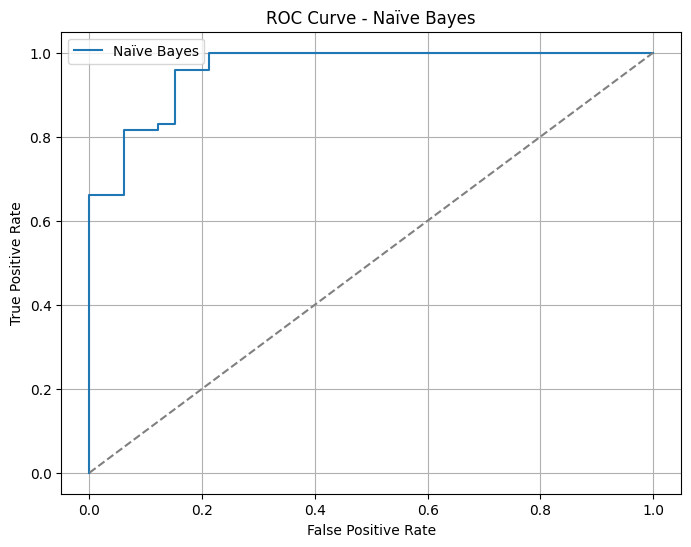

In [9]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Naïve Bayes')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naïve Bayes')
plt.legend()
plt.grid()
plt.show()
